<a href="https://colab.research.google.com/github/gonzalootero55/data-portfolio/blob/main/Bariloche_Gonzalo_Otero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de la demanda de vuelos hacia San Carlos de Bariloche**

---



### Para este proyecto elegi el dataset de vuelos comerciales provistos por SINTA (Sistema de información turistica de la Argentina). Este conjunto de datos me pareció interesante ya que contiene información detallada y estructurada sobre cada vuelo (fecha, aerolínea, origen y destino, origen de aeropuertos, entre otros), lo que me permitió analizar tendencias temporales y estacionalidad.

###La propuesta es estudiar, particularmente, los vuelos con destino a San Carlos de Bariloche desde Ciudad Autónoma de Buenos Aires, teniendo en cuenta que es un destino turístico con una marcada estacionalidad.



###Los resultados obtenidos podrían ser de uso para planificación operativa de aerolíneas y gestión turística.

###**link del dataset utilizado:** https://datos.yvera.gob.ar/dataset/conectividad-aerea/archivo/aab49234-28c9-48ab-a978-a83485139290

 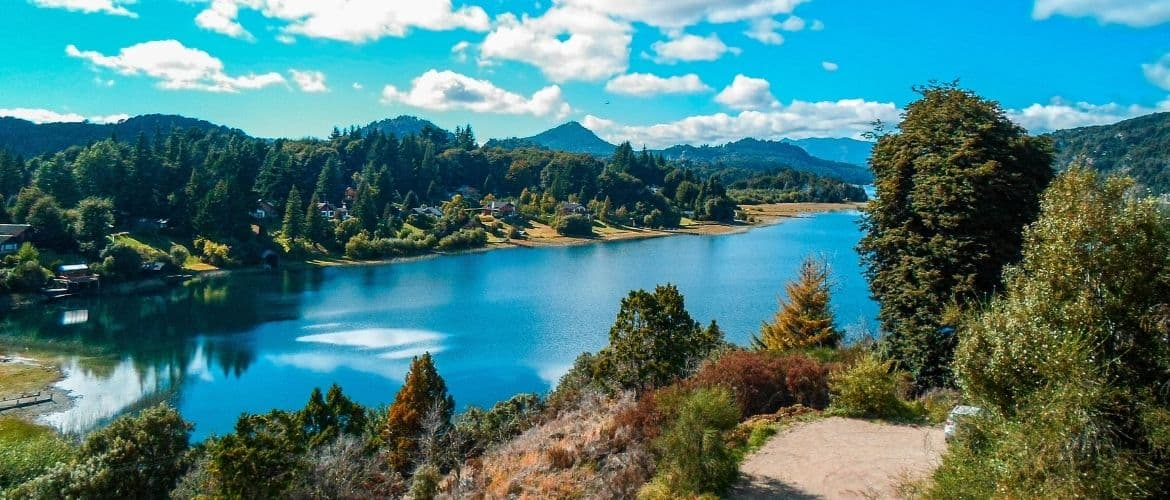




## **Objetivo del proyecto:**

### Construir un análisis exploratorio de la demanda mensual de vuelos hacia Bariloche y desarrollar un modelo predictivo que estime la cantidad de vuelos mensuales del año 2026 desde la Ciudad Autónoma de Buenos Aires.

## **Exploración de los datos**

###El dataset que utilice para este proyecto corresponde a los datos de vuelos comerciales publicados por SINTA.

###Este dataset contiene un registro detallado por cada vuelo en Argentina, incluyendo la fecha, el lugar y aerolinea.

###Para comenzar el análisis se realizó una observación general del conjunto de datos:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


In [ ]:
df_drive = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/base_microdatos.csv')
display(df_drive.head())

,indice_tiempo,clasificacion_vuelo,clase_vuelo,aerolinea,origen_oaci,origen_aeropuerto,origen_localidad,origen_provincia,origen_pais,origen_continente,destino_oaci,destino_aeropuerto,destino_localidad,destino_provincia,destino_pais,destino_continente,pasajeros,asientos,vuelos
0,2017-01-01,Cabotaje,No Regular,Andes Líneas Aéreas,SAAV,Aeropuerto de Sauce Viejo,Santa Fe,Santa Fe,Argentina,América del Sur,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,85,85,1
1,2017-01-01,Cabotaje,No Regular,Andes Líneas Aéreas,SASA,Aeropuerto Int. Martín Miguel de Güemes,Salta,Salta,Argentina,América del Sur,SASJ,Aeropuerto Int. Gdor. Horacio Guzmán,San Salvador de Jujuy,Jujuy,Argentina,América del Sur,23,83,1
2,2017-01-01,Cabotaje,No Regular,Andes Líneas Aéreas,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,SAAV,Aeropuerto de Sauce Viejo,Santa Fe,Santa Fe,Argentina,América del Sur,78,83,1
3,2017-01-01,Cabotaje,Regular,Aerolíneas Argentinas,SAAR,Aeropuerto Int. de Rosario Islas Malvinas,Rosario,Santa Fe,Argentina,América del Sur,SACO,Aeropuerto Int. Ingeniero Ambrosio Taravella,Córdoba,Córdoba,Argentina,América del Sur,48,128,1
4,2017-01-01,Cabotaje,Regular,Aerolíneas Argentinas,SAAR,Aeropuerto Int. de Rosario Islas Malvinas,Rosario,Santa Fe,Argentina,América del Sur,SAEZ,Aeropuerto Int. Ministro Pistarini,Ezeiza,Buenos Aires,Argentina,América del Sur,90,128,1


## **Dimensiones del dataset**

###El dataset cuenta con 963.465 filas y 19 columnas, abarcando el período 2017–2025.


In [ ]:
print("Dimensiones del dataset (filas, columnas):")
print(df_drive.shape)

Dimensiones del dataset (filas, columnas):
(963465, 19)


##**Tipos de datos**

###El dataset presenta la siguiente combinación de datos:


*   Categóricos (aerolínea, origen, destino, códigos de aeropuerto)

*   Fechas (fecha del vuelo)

*   Texto (nombres de localidades y provincias)



In [ ]:
print("\nInformación del dataset:")
df_drive.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963465 entries, 0 to 963464
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   indice_tiempo        963465 non-null  object
 1   clasificacion_vuelo  963465 non-null  object
 2   clase_vuelo          963465 non-null  object
 3   aerolinea            963465 non-null  object
 4   origen_oaci          963465 non-null  object
 5   origen_aeropuerto    963465 non-null  object
 6   origen_localidad     963465 non-null  object
 7   origen_provincia     759450 non-null  object
 8   origen_pais          963465 non-null  object
 9   origen_continente    963464 non-null  object
 10  destino_oaci         963465 non-null  object
 11  destino_aeropuerto   963465 non-null  object
 12  destino_localidad    963465 non-null  object
 13  destino_provincia    758008 non-null  object
 14  destino_pais         963465 non-null  object
 15  destino_

## **Valores faltantes y duplicados**

###Verifique valores faltantes en algunas columnas no esenciales, y registros con datos incompletos que fueron eliminados.
###También revise valores duplicados y los registros duplicados fueron removidos para hacer que el resultado sea lo más preciso posible.

In [ ]:
print("\nCantidad de valores faltantes por columna:")
display(df_drive.isna().sum())


Cantidad de valores faltantes por columna:


,0
indice_tiempo,0
clasificacion_vuelo,0
clase_vuelo,0
aerolinea,0
origen_oaci,0
origen_aeropuerto,0
origen_localidad,0
origen_provincia,204015
origen_pais,0
origen_continente,1


In [ ]:
duplicados = df_drive.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicados}")


Cantidad de filas duplicadas: 64


In [ ]:
duplicados_antes = df_drive.duplicated().sum()
df_drive = df_drive.drop_duplicates()
duplicados_despues = df_drive.duplicated().sum()

print(f"Duplicados eliminados: {duplicados_antes - duplicados_despues}")

Duplicados eliminados: 64


## **Variables seleccionadas para el análisis:**


- indice_tiempo: Fecha en la que se realizó el vuelo. Esta variable es importante para definir la estacionalidad.

- origen_localidad: Ciudad desde la cual despegó el vuelo.

- destino_localidad: Ciudad a la cual arribó el vuelo.

### Estas variables permitirán construir una base para analizar la cantidad de vuelos por períodos y ciudades.


In [ ]:
columnas_deseadas = ['indice_tiempo', 'aerolinea', 'origen_localidad', 'destino_localidad']
df = df_drive[columnas_deseadas]

display(df.head(5))

,indice_tiempo,aerolinea,origen_localidad,destino_localidad
0,2017-01-01,Andes Líneas Aéreas,Santa Fe,San Carlos de Bariloche
1,2017-01-01,Andes Líneas Aéreas,Salta,San Salvador de Jujuy
2,2017-01-01,Andes Líneas Aéreas,San Carlos de Bariloche,Santa Fe
3,2017-01-01,Aerolíneas Argentinas,Rosario,Córdoba
4,2017-01-01,Aerolíneas Argentinas,Rosario,Ezeiza


In [ ]:
df_brc = df[(df['destino_localidad'] == 'San Carlos de Bariloche')]
display(df_brc.head(5))

,indice_tiempo,aerolinea,origen_localidad,destino_localidad
0,2017-01-01,Andes Líneas Aéreas,Santa Fe,San Carlos de Bariloche
21,2017-01-01,Aerolíneas Argentinas,Ciudad de Buenos Aires,San Carlos de Bariloche
27,2017-01-01,Aerolíneas Argentinas,Córdoba,San Carlos de Bariloche
34,2017-01-01,Aerolíneas Argentinas,Ezeiza,San Carlos de Bariloche
53,2017-01-01,Aerolíneas Argentinas,El Calafate,San Carlos de Bariloche


## **Estandarización de columnas de fecha**

### Cambié al formato datetime la variable "indice_tiempo" para poder hacer el conteo de los vuelos con una nueva variable, la cual le di el nombre de "cantidad_de_vuelos" filtrando luego por "Ciudad Autónoma de Buenos Aires".

In [ ]:
df_brc['indice_tiempo'] = pd.to_datetime(df_brc['indice_tiempo'])
df_brc['periodo_mensual'] = df_brc['indice_tiempo'].dt.strftime('%Y-%m')
df_conteo_mensual = df_brc.groupby(['periodo_mensual', 'origen_localidad']).size().reset_index(name='cantidad_de_vuelos')

display(df_conteo_mensual.head())

/tmp/ipython-input-2141166153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brc['indice_tiempo'] = pd.to_datetime(df_brc['indice_tiempo'])
/tmp/ipython-input-2141166153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brc['periodo_mensual'] = df_brc['indice_tiempo'].dt.strftime('%Y-%m')


,periodo_mensual,origen_localidad,cantidad_de_vuelos
0,2017-01,Ciudad de Buenos Aires,82
1,2017-01,Comodoro Rivadavia,4
2,2017-01,Córdoba,23
3,2017-01,El Calafate,31
4,2017-01,Ezeiza,33


In [ ]:
df_caba = df_conteo_mensual[df_conteo_mensual['origen_localidad'] == 'Ciudad de Buenos Aires']
display(df_caba.head())

,periodo_mensual,origen_localidad,cantidad_de_vuelos
0,2017-01,Ciudad de Buenos Aires,82
12,2017-02,Ciudad de Buenos Aires,76
23,2017-03,Ciudad de Buenos Aires,84
31,2017-04,Ciudad de Buenos Aires,78
39,2017-05,Ciudad de Buenos Aires,83


##**Analisis mediante boxplots (2024-2025)**

### Lo que se busco analizar con los boxplots fue un analisis exploratorio del año 2024 y 2025 sobre la variable "cantidad de vuelos" con el objetivo de **identificar posibles valores atípicos**. Si bien se observaron valores elevados en determinados meses, estos corresponden a períodos de alta demanda estacional, por lo que **no se consideraron outliers erróneos.** En consecuencia, decidí conservar estos valores, ya que representan comportamientos reales del caso estudiado y aportan información relevante para el modelo predictivo.

In [ ]:
df_caba_2024 = df_caba[df_caba['periodo_mensual'].str.startswith('2024')]
display(df_caba_2024.head())

,periodo_mensual,origen_localidad,cantidad_de_vuelos
782,2024-01,Ciudad de Buenos Aires,89
792,2024-02,Ciudad de Buenos Aires,82
802,2024-03,Ciudad de Buenos Aires,92
812,2024-04,Ciudad de Buenos Aires,77
821,2024-05,Ciudad de Buenos Aires,89


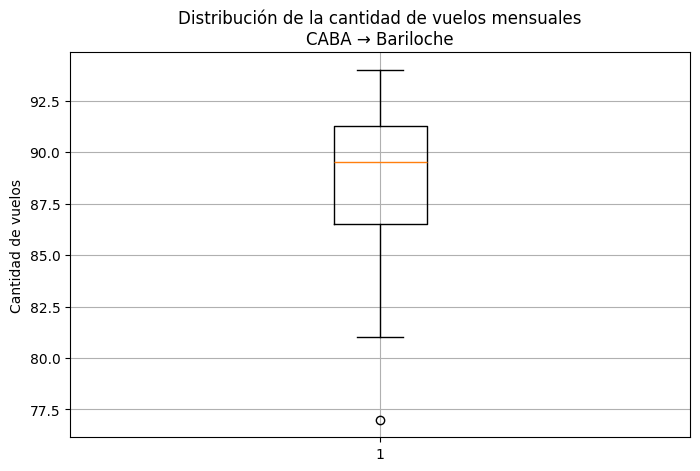

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df_caba_2024["cantidad_de_vuelos"])
plt.title("Distribución de la cantidad de vuelos mensuales\nCABA → Bariloche")
plt.ylabel("Cantidad de vuelos")
plt.grid(True)
plt.show()


In [ ]:
df_caba_2025 = df_caba[df_caba['periodo_mensual'].str.startswith('2025')]
display(df_caba_2025.head())

,periodo_mensual,origen_localidad,cantidad_de_vuelos
939,2025-01,Ciudad de Buenos Aires,86
950,2025-02,Ciudad de Buenos Aires,69
958,2025-03,Ciudad de Buenos Aires,77
967,2025-04,Ciudad de Buenos Aires,86
974,2025-05,Ciudad de Buenos Aires,93


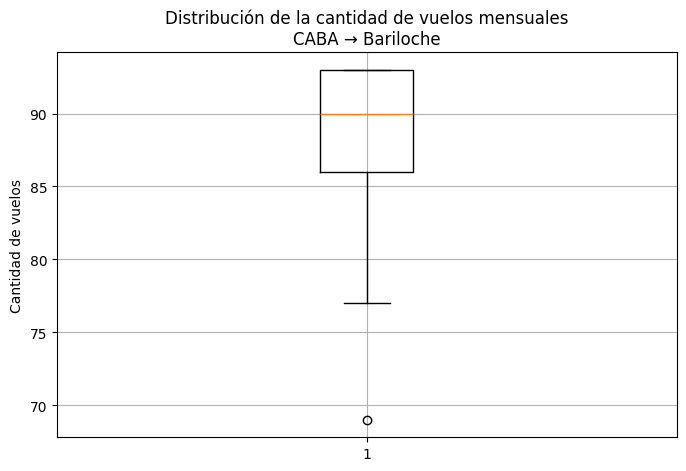

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df_caba_2025["cantidad_de_vuelos"])
plt.title("Distribución de la cantidad de vuelos mensuales\nCABA → Bariloche")
plt.ylabel("Cantidad de vuelos")
plt.grid(True)
plt.show()

##**Análisis de Temporada 2024**

###Durante 2024 se observa el siguiente comportamiento:

###-Mes más bajo: abril con 77 vuelos.

###-Mes más alto: agosto con 94 vuelos.

###Interpretación:
###El año 2024 muestra una alta demanda en invierno. La caída de abril responde al cierre del verano turístico y antes del inicio de la temporada de nieve.

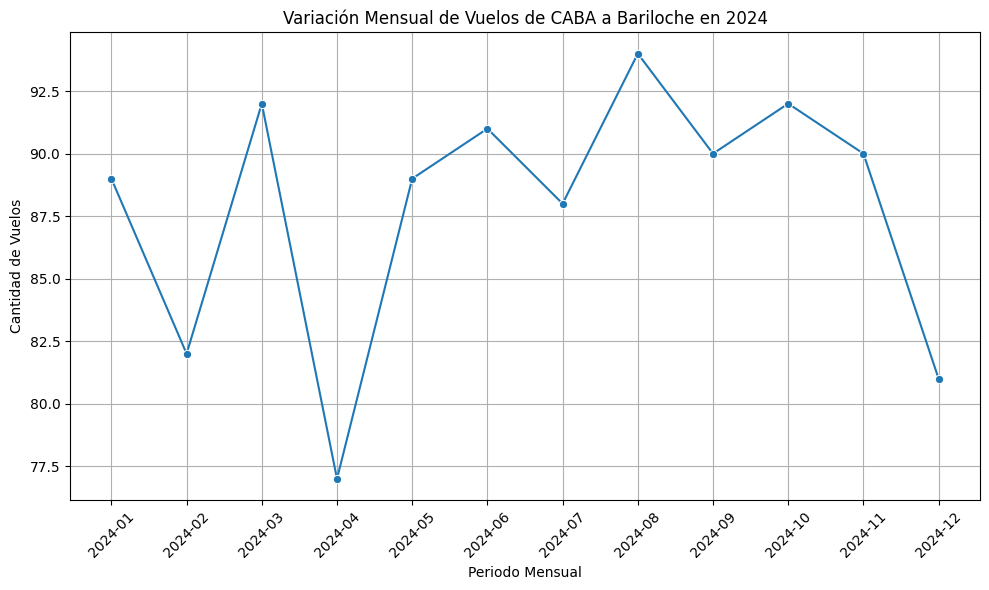

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='periodo_mensual', y='cantidad_de_vuelos', data=df_caba_2024, marker='o')
plt.title('Variación Mensual de Vuelos de CABA a Bariloche en 2024')
plt.xlabel('Periodo Mensual')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## **Análisis de Temporada 2025**

###En el año 2025 se pueden observar los siguientes comportamientos:

###Mes más bajo: febrero con 69 vuelos.

###Mes más alto: mayo con 93 vuelos.

###Interpretación:
###En el 2025 finalizando el mes de febrero se puede ver un aumento considerable en la demanda de vuelos, llegando a su pico en julio, lo cual es una buena representación del plano realista.

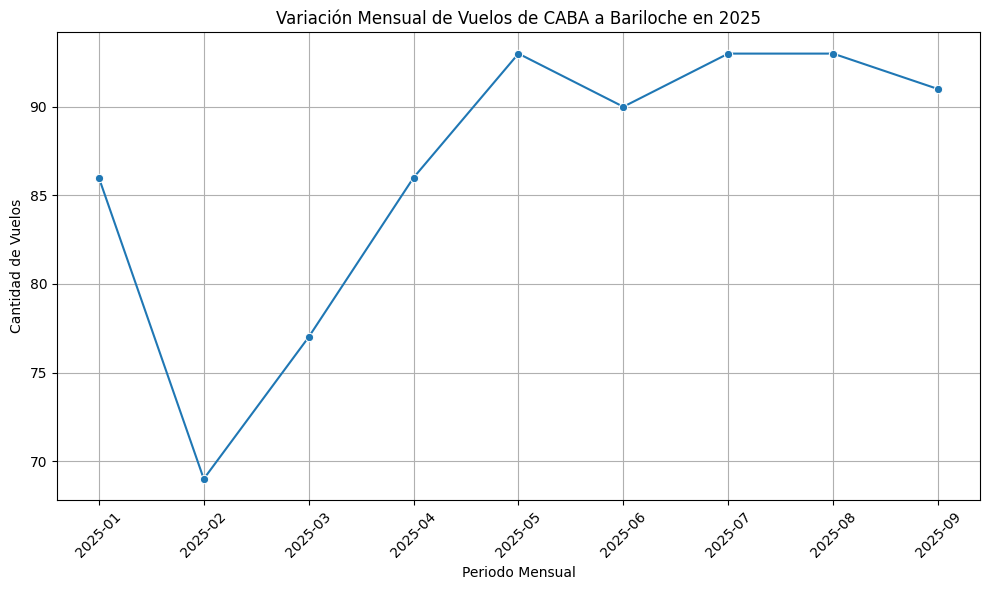

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='periodo_mensual', y='cantidad_de_vuelos', data=df_caba_2025, marker='o')
plt.title('Variación Mensual de Vuelos de CABA a Bariloche en 2025')
plt.xlabel('Periodo Mensual')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## **Comparación 2024 vs 2025**

###El gráfico combinado muestra claramente que 2025 arranca más bajo que 2024 (especialmente febrero) y en mayo–agosto 2025 iguala o supera levemente a 2024.

###Esto indica que en ambos periodos la temporada invernal es la mas demandada, y nos muestra que la temporada de verano tiene una menor cantidad de vuelos.

###Esto permite hacer una proyección consistente para 2026.

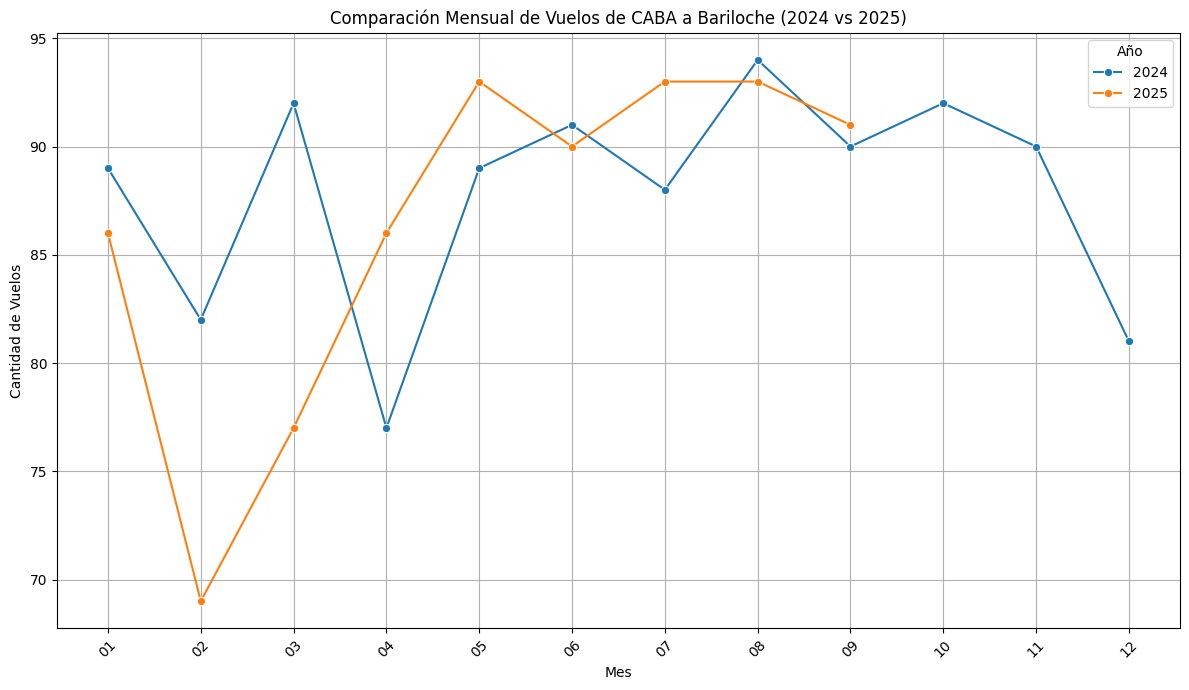

In [ ]:
df_caba_2024_yearly = df_caba_2024.copy()
df_caba_2024_yearly['year'] = '2024'
df_caba_2024_yearly['month'] = df_caba_2024_yearly['periodo_mensual'].str[5:] # Extract month part

df_caba_2025_yearly = df_caba_2025.copy()
df_caba_2025_yearly['year'] = '2025'
df_caba_2025_yearly['month'] = df_caba_2025_yearly['periodo_mensual'].str[5:] # Extract month part

df_combined = pd.concat([df_caba_2024_yearly, df_caba_2025_yearly])

plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='cantidad_de_vuelos', hue='year', data=df_combined, marker='o')
plt.title('Comparación Mensual de Vuelos de CABA a Bariloche (2024 vs 2025)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

# **Resumen de hallazgos iniciales**

###A partir del análisis exploratorio del dataset de vuelos hacia San Carlos de Bariloche, se puede notar patrones importantes, los cuales permiten entender el comportamiento de la demanda hacia este destino.

###En primer lugar, hay una marcada estacionalidad en la cantidad de vuelos. Los meses correspondientes a la temporada de invierno y de verano presentan un incremento notable en la cantidad de vuelvos, mientras que los meses intermedios registran una disminución. Esto sugiere que la demanda está fuertemente influenciada por factores turísticos y condiciones climáticas.

###En cuanto a la calidad del dataset, los primeros análisis que realice me permitieron identificar valores duplicados y faltantes, los cuales fueron tratados correctamente mediante eliminación o estandarización, asegurando así la integridad del análisis posterior.


## **Definición del problema y selección del modelo**

###El objetivo principal del proyecto es predecir la demanda futura de vuelos hacia San Carlos de Bariloche, a partir de la información histórica disponible en el dataset. Comprender cómo evoluciona la cantidad de vuelos en función del tiempo y la estacionalidad.

###Para este proyecto se seleccionaron dos modelos: Regresión Lineal y SARIMA.
###El primero modelo fue utilizado para lograr una primer aproximación de la proyección del año 2026.
###Sin embargo, considerando la variación de los meses en función a la cantidad de vuelos, me pareció correcto complementar el análisis con el modelo SARIMA, el cual permite tener una proyección con variabilidad.


In [ ]:
df_modelo = df_caba[
    df_caba["periodo_mensual"].str.startswith(("2024", "2025"))
].copy()

df_modelo.head()


,periodo_mensual,origen_localidad,cantidad_de_vuelos
782,2024-01,Ciudad de Buenos Aires,89
792,2024-02,Ciudad de Buenos Aires,82
802,2024-03,Ciudad de Buenos Aires,92
812,2024-04,Ciudad de Buenos Aires,77
821,2024-05,Ciudad de Buenos Aires,89


In [ ]:
df_modelo["anio"] = df_modelo["periodo_mensual"].str[:4].astype(int)
df_modelo["mes"] = df_modelo["periodo_mensual"].str[5:7].astype(int)

df_modelo.head()


,periodo_mensual,origen_localidad,cantidad_de_vuelos,anio,mes
782,2024-01,Ciudad de Buenos Aires,89,2024,1
792,2024-02,Ciudad de Buenos Aires,82,2024,2
802,2024-03,Ciudad de Buenos Aires,92,2024,3
812,2024-04,Ciudad de Buenos Aires,77,2024,4
821,2024-05,Ciudad de Buenos Aires,89,2024,5


In [ ]:
X = df_modelo[["anio", "mes"]]
y = df_modelo["cantidad_de_vuelos"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")



MAE: 2.43
RMSE: 3.33
R²: -0.17


###El rendimiento del modelo fue evaluado utilizando métricas de error como MAE, RMSE y R², las cuales permiten medir la precisión promedio del modelo y su capacidad explicativa sobre la variabilidad de los datos.

###El modelo de regresión lineal presenta un error medio absoluto (MAE) de 2.43 vuelos mensuales y un RMSE de 3.33, lo que indica una buena precisión promedio en términos absolutos. Sin embargo, el coeficiente de determinación R² resulta negativo (-0.17), lo cual sugiere que el modelo no logra capturar completamente la variabilidad de la demanda.


In [ ]:
df_2026 = pd.DataFrame({
    "anio": [2026] * 12,
    "mes": list(range(1, 13))
})


df_2026["vuelos_predichos"] = modelo.predict(df_2026[["anio", "mes"]])

df_2026


,anio,mes,vuelos_predichos
0,2026,1,82.252013
1,2026,2,83.167472
2,2026,3,84.082931
3,2026,4,84.998390
4,2026,5,85.913849
5,2026,6,86.829308
6,2026,7,87.744767
7,2026,8,88.660225
8,2026,9,89.575684
9,2026,10,90.491143


##**Visualización del modelo Regresión lineal**

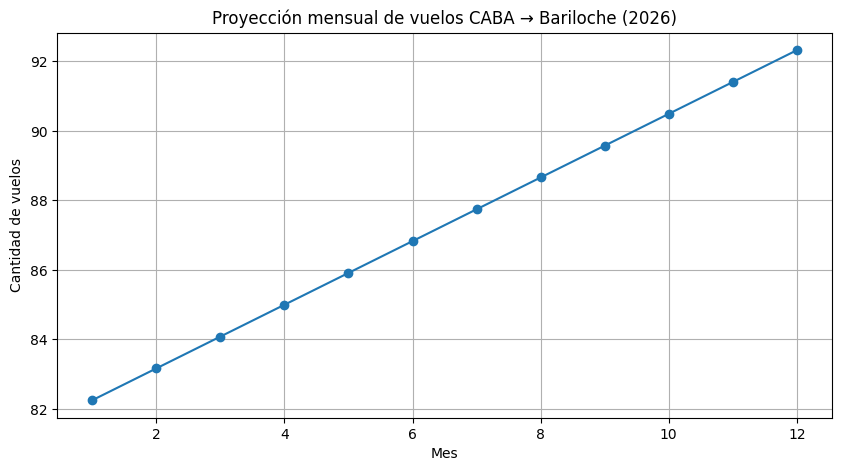

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_2026["mes"], df_2026["vuelos_predichos"], marker="o")
plt.title("Proyección mensual de vuelos CABA → Bariloche (2026)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de vuelos")
plt.grid(True)
plt.show()


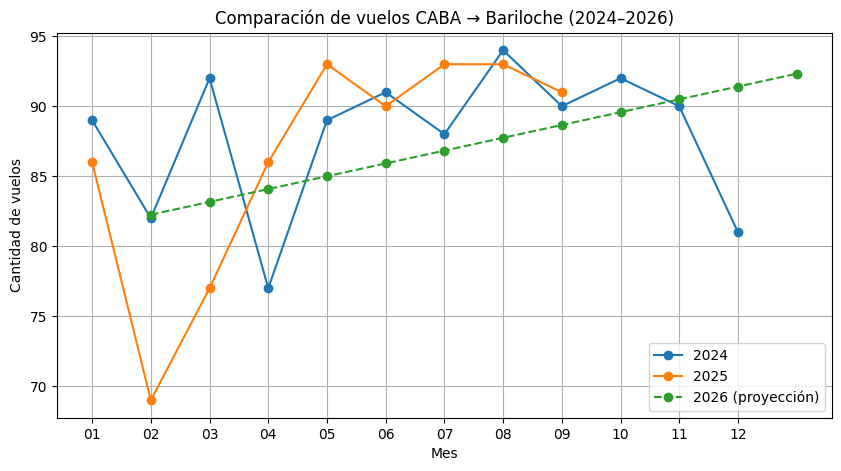

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(df_caba_2024["periodo_mensual"].str[5:7],
         df_caba_2024["cantidad_de_vuelos"],
         marker="o",
         label="2024")

plt.plot(df_caba_2025["periodo_mensual"].str[5:7],
         df_caba_2025["cantidad_de_vuelos"],
         marker="o",
         label="2025")

plt.plot(df_2026["mes"],
         df_2026["vuelos_predichos"],
         marker="o",
         linestyle="--",
         label="2026 (proyección)")

plt.title("Comparación de vuelos CABA → Bariloche (2024–2026)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de vuelos")
plt.legend()
plt.grid(True)
plt.show()


###La proyección para el año 2026 presenta una tendencia más suave en comparación con los datos observados en 2024 y 2025. Este comportamiento es consistente con la utilización de un modelo de regresión lineal, el cual captura la tendencia general de la demanda y la estacionalidad promedio, pero no genera que no podamos visualizar puntos màximos y mínimos asociados a la proyección.

###Por este motivo, este primer modelo debe interpretarse como una **estimación de referencia**.

##**Preparación de datos para el modelo SARIMA**

In [ ]:

df_ts = df_caba[
    df_caba["periodo_mensual"].str.startswith(("2024", "2025"))
].copy()


df_ts["fecha"] = pd.to_datetime(df_ts["periodo_mensual"], format="%Y-%m")

df_ts = df_ts.sort_values("fecha")


serie = df_ts.set_index("fecha")["cantidad_de_vuelos"]

serie



,cantidad_de_vuelos
fecha,
2024-01-01,89
2024-02-01,82
2024-03-01,92
2024-04-01,77
2024-05-01,89
2024-06-01,91
2024-07-01,88
2024-08-01,94
2024-09-01,90


##Ajuste del modelo SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_sarima = SARIMAX(
    serie,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

resultado_sarima = modelo_sarima.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


### Para la proyección de la demanda de vuelos se utilizó un modelo SARIMA, adecuado para el análisis de series temporales con estacionalidad anual. El modelo fue entrenado con datos mensuales de 2024 y 2025, permitiendo capturar la tendencia y el patrón estacional de la serie. Debido al tamaño reducido de la muestra, algunas métricas estadísticas no resultan concluyentes. Sin embargo, el modelo reproduce de manera coherente el comportamiento histórico observado. Los resultados obtenidos se interpretan como una estimación orientativa para el año 2026.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_sarima = SARIMAX(
    serie,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

resultado_sarima = modelo_sarima.fit()

print(resultado_sarima.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/usr/local/lib/python3.12/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: invalid value encountered in l

                                     SARIMAX Results                                      
Dep. Variable:                 cantidad_de_vuelos   No. Observations:                   21
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sat, 13 Dec 2025   AIC                             10.000
Time:                                    19:20:47   BIC                                nan
Sample:                                01-01-2024   HQIC                               nan
                                     - 09-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2711         -0        inf      0.000      -0.271      -0.271
ma.L1          0.0399         -0   

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
pred_2026 = resultado_sarima.forecast(steps=12)

pred_2026


,predicted_mean
2025-10-01,92.480029
2025-11-01,90.620976
2025-12-01,81.582770
2026-01-01,86.593126
2026-02-01,69.590319
2026-03-01,77.591080
2026-04-01,86.590874
2026-05-01,93.590930
2026-06-01,90.590914
2026-07-01,93.590919


In [ ]:

fechas_2026 = pd.date_range(start="2026-01-01", periods=12, freq="MS")

df_2026_sarima = pd.DataFrame({
    "fecha": fechas_2026,
    "vuelos_predichos": pred_2026.values
})

df_2026_sarima


,fecha,vuelos_predichos
0,2026-01-01,92.480029
1,2026-02-01,90.620976
2,2026-03-01,81.582770
3,2026-04-01,86.593126
4,2026-05-01,69.590319
5,2026-06-01,77.591080
6,2026-07-01,86.590874
7,2026-08-01,93.590930
8,2026-09-01,90.590914
9,2026-10-01,93.590919


##**Visualización del modelo SARIMA**

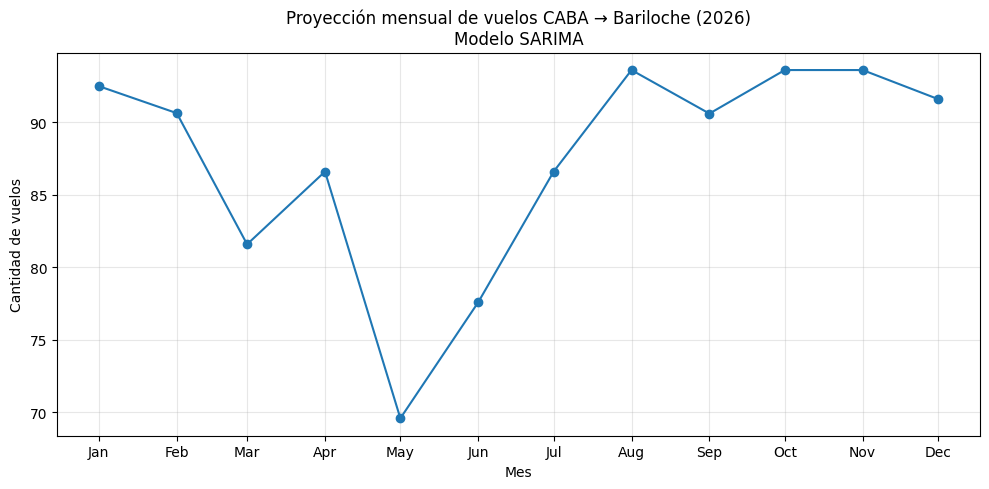

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(
    df_2026_sarima["fecha"],
    df_2026_sarima["vuelos_predichos"],
    marker="o"
)

plt.title("Proyección mensual de vuelos CABA → Bariloche (2026)\nModelo SARIMA")
plt.xlabel("Mes")
plt.ylabel("Cantidad de vuelos")
plt.xticks(df_2026_sarima["fecha"], df_2026_sarima["fecha"].dt.strftime("%b"))
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



In [ ]:
df_2024 = df_ts[df_ts["fecha"].dt.year == 2024]
df_2025 = df_ts[df_ts["fecha"].dt.year == 2025]


## Inicialmente se implementó un modelo de regresión lineal como aproximación base, con el objetivo de evaluar la relación entre el tiempo y la cantidad de vuelos. Si bien este modelo permitió identificar una tendencia general, presentó limitaciones para analisar las variaciones en los datos.

##Debido a estas limitaciones, se implementó posteriormente un modelo SARIMA, el cual permitió una proyección más coherente con el comportamiento histórico observado. Por este motivo, el modelo SARIMA fue seleccionado como el **modelo principal para la proyección de vuelos correspondiente al año 2026.**

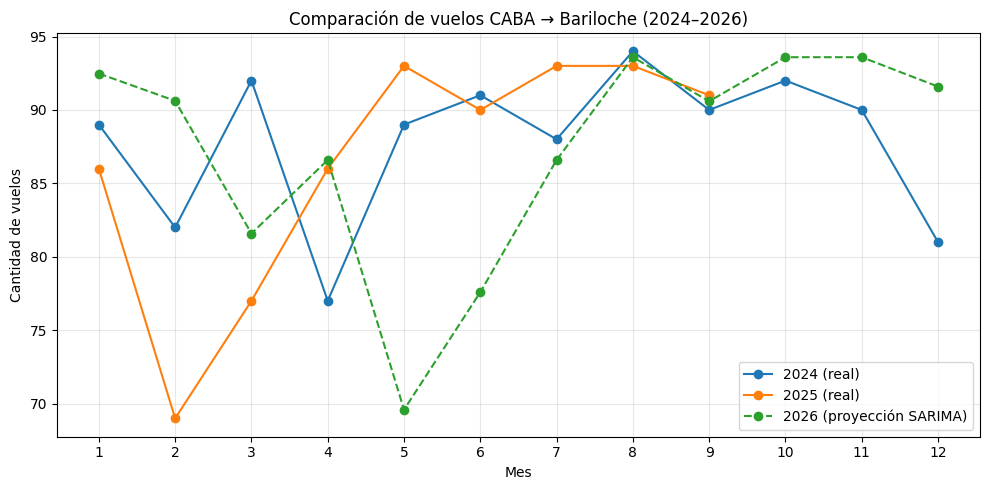

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(
    df_2024["fecha"].dt.month,
    df_2024["cantidad_de_vuelos"],
    marker="o",
    label="2024 (real)"
)

plt.plot(
    df_2025["fecha"].dt.month,
    df_2025["cantidad_de_vuelos"],
    marker="o",
    label="2025 (real)"
)

plt.plot(
    df_2026_sarima["fecha"].dt.month,
    df_2026_sarima["vuelos_predichos"],
    marker="o",
    linestyle="--",
    label="2026 (proyección SARIMA)"
)

plt.title("Comparación de vuelos CABA → Bariloche (2024–2026)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de vuelos")
plt.xticks(range(1,13))
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


#**CONCLUSIÓN DEL TRABAJO PRÁCTICO**
 - ## Conclusión general

### El análisis realizado sobre los vuelos desde la Ciudad Autónoma de Buenos Aires hacia San Carlos de Bariloche permitió identificar patrones estacionales claros asociados a la demanda turística, especialmente durante los meses de invierno. A partir del análisis exploratorio y estadístico de los datos correspondientes a los años 2024 y 2025, se observó una variación significativa en la cantidad de vuelos mensuales, con incrementos durante los períodos considerados de alta temporada.

### Dado que los años anteriores a 2024 presentan comportamientos atípicos debido a factores externos, se decidió focalizar el análisis y el modelado exclusivamente en los datos más recientes, con el objetivo de obtener una proyección más representativa del contexto actual.

- ## Modelo y resultados

### Para la proyección de la cantidad de vuelos durante el año 2026 se implementó un modelo SARIMA. Este modelo permitió capturar la estructura temporal de los datos y generar una estimación mensual coherente con las tendencias observadas en los años analizados.

### Los resultados obtenidos muestran una proyección estable para 2026, manteniendo un patrón estacional similar al de los años anteriores, aunque sin reproducir picos extremos. Esto se debe a que el modelo prioriza la tendencia general y la estacionalidad promedio, constituyendo una aproximación razonable para la planificación a mediano plazo.

- ## Limitaciones del análisis

###Es importante destacar que la proyección realizada no incorpora variables externas como eventos turísticos, cambios económicos, políticas de transporte o condiciones climáticas, las cuales podrían influir significativamente en la demanda real de vuelos.

**Trabajo práctico realizado por Gonzalo Otero.**